# Airline Passenger Satisfaction Project


## Task Description

### There is the following information about the passengers of some airline:

* Gender: male or female
* Customer type: regular or non-regular airline customer
* Age: the actual age of the passenger
* Type of travel: the purpose of the passenger's flight (personal or business travel)
* Class: business, economy, economy plus
* Flight distance
* Inflight wifi service: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
* Departure/Arrival time convenient: departure/arrival time satisfaction level (0: not rated; 1-5)
* Ease of Online booking: online booking satisfaction rate (0: not rated; 1-5)
* Gate location: level of satisfaction with the gate location (0: not rated; 1-5)
* Food and drink: food and drink satisfaction level (0: not rated; 1-5)
* Online boarding: satisfaction level with online boarding (0: not rated; 1-5)
* Seat comfort: seat satisfaction level (0: not rated; 1-5)
* Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)
* On-board service: level of satisfaction with on-board service (0: not rated; 1-5)
* Leg room service: level of satisfaction with leg room service (0: not rated; 1-5)
* Baggage handling: level of satisfaction with baggage handling (0: not rated; 1-5)
* Checkin service: level of satisfaction with checkin service (0: not rated; 1-5)
* Inflight service: level of satisfaction with inflight service (0: not rated; 1-5)
* Cleanliness: level of satisfaction with cleanliness (0: not rated; 1-5)
* Departure delay in minutes
* Arrival delay in minutes
* This data set contains a survey on air passenger satisfaction. The following classification problem is set:
* It is necessary to predict which of the two levels of satisfaction with the airline the passenger belongs to:

* Satisfaction
* Neutral or dissatisfied

# Reading Data

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [91]:
df = pd.read_csv("Invistico_Airline.csv")

* Each row corresponds to one passenger, and each column to a specific feature.
Let's look at the first and last rows of the data set:

In [92]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


* Let's take a closer look at the dataset data:

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [94]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

#### You may notice the following:

* The column corresponding to the Arrival Delay in Minutes feature has 393 missing values.

# Data visualization and calculation of the main characteristics

* Get summary information about quantitative features by calling the "describe" method with default parameters:

In [95]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Visualization

<Axes: xlabel='Gender', ylabel='count'>

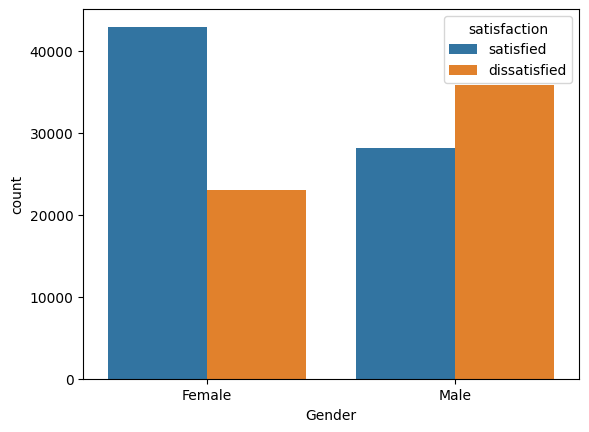

In [96]:
sns.countplot(x=df["Gender"], hue=df["satisfaction"])

In [97]:
df["Gender"].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [98]:
pd.crosstab(index=df["satisfaction"], columns=df["Gender"])

Gender,Female,Male
satisfaction,,
dissatisfied,22971,35822
satisfied,42928,28159


<Axes: xlabel='Customer Type', ylabel='count'>

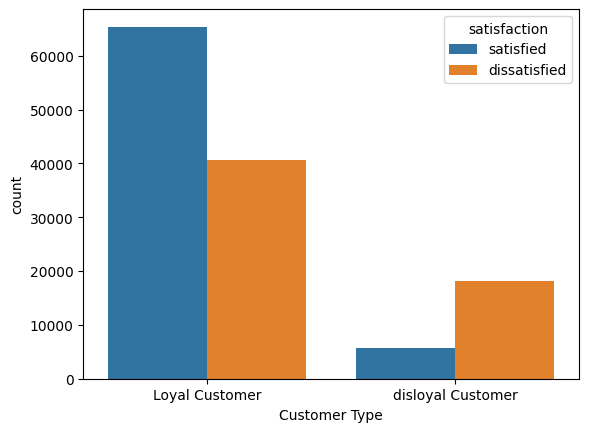

In [99]:
sns.countplot(x=df["Customer Type"], hue=df["satisfaction"])

<Axes: xlabel='Customer Type', ylabel='count'>

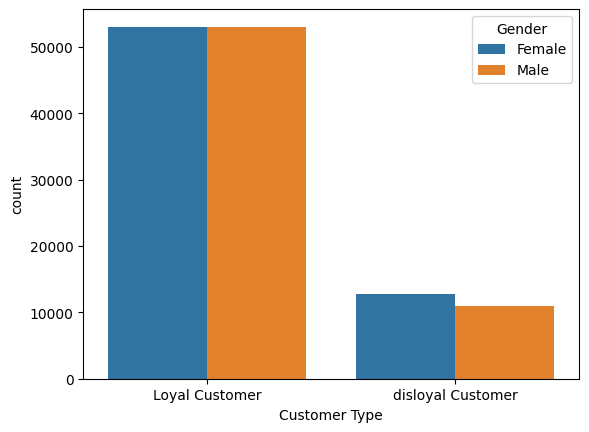

In [100]:
sns.countplot(x=df["Customer Type"], hue=df["Gender"])

In [101]:
pd.crosstab(index=df["Customer Type"], columns=df["Gender"])

Gender,Female,Male
Customer Type,,
Loyal Customer,53056,53044
disloyal Customer,12843,10937


<Axes: xlabel='Type of Travel', ylabel='count'>

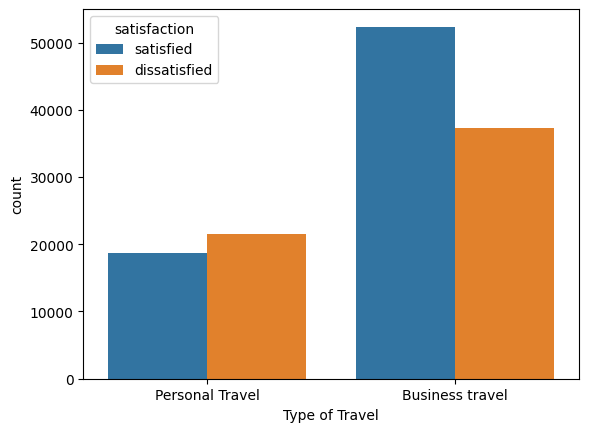

In [102]:
sns.countplot(x=df["Type of Travel"], hue=df["satisfaction"])

<Axes: xlabel='Type of Travel', ylabel='count'>

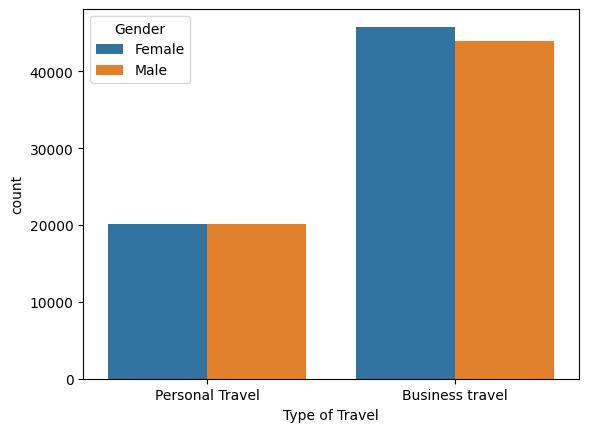

In [103]:
sns.countplot(x=df["Type of Travel"], hue=df["Gender"])

<Axes: xlabel='Type of Travel', ylabel='count'>

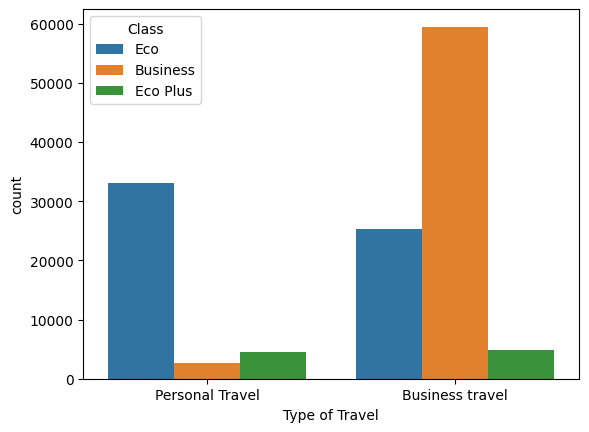

In [104]:
sns.countplot(x=df["Type of Travel"], hue=df["Class"])

<Axes: xlabel='Type of Travel', ylabel='count'>

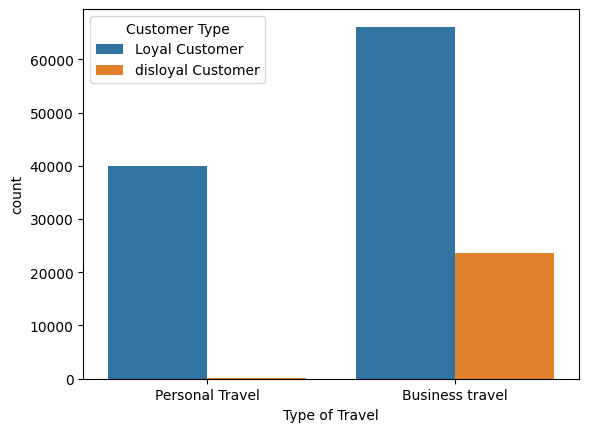

In [105]:
sns.countplot(x=df["Type of Travel"], hue=df["Customer Type"])

<Axes: xlabel='Class', ylabel='count'>

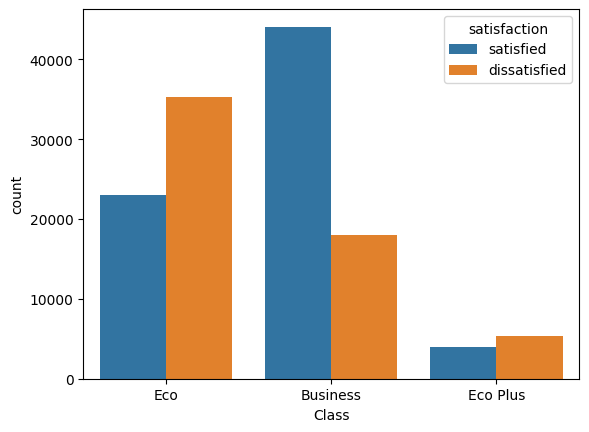

In [106]:
sns.countplot(x=df["Class"], hue=df["satisfaction"])

* This chart is very revealing. 
* You can see that most of the passengers who flew in economy plus or economy class were dissatisfied with the flight, and those who were lucky enough to fly in business class were satisfied.

<Axes: xlabel='Age', ylabel='Count'>

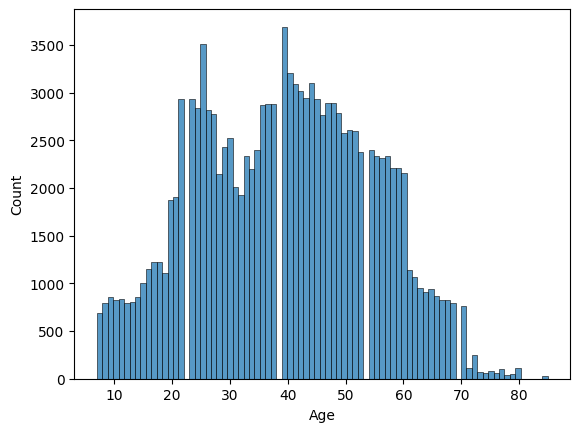

In [107]:
sns.histplot(df, x="Age")

<Axes: >

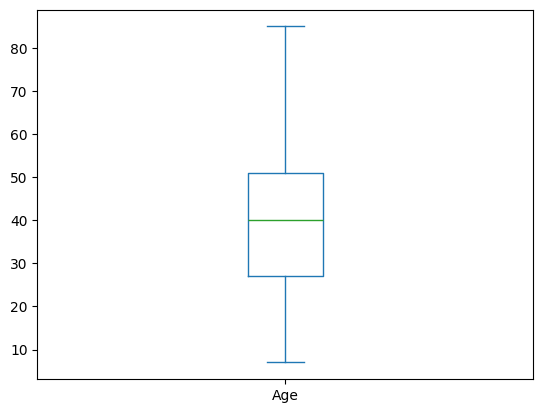

In [108]:
df["Age"].plot.box()

In [109]:
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0


<Axes: xlabel='Flight Distance', ylabel='Count'>

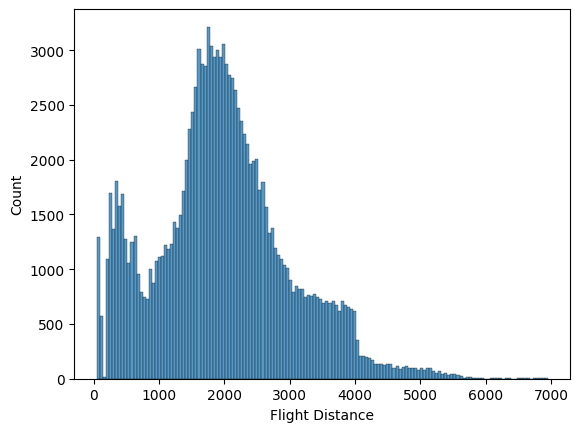

In [110]:
sns.histplot(df, x="Flight Distance")

<Axes: >

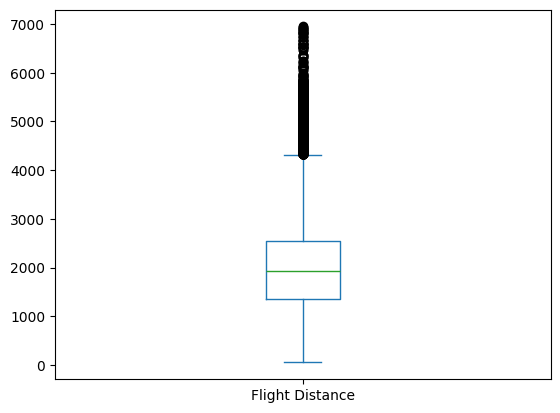

In [111]:
df["Flight Distance"].plot.box()

<Axes: >

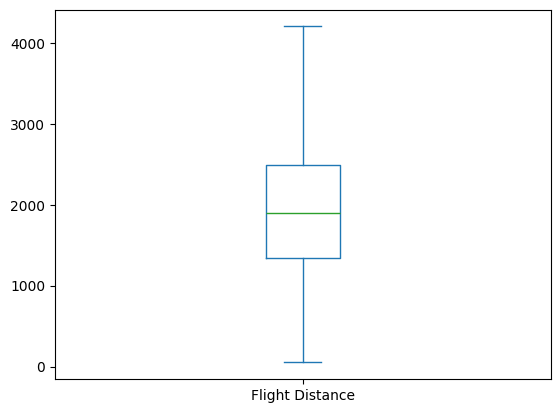

In [23]:
df[df["Flight Distance"]<=df["Flight Distance"].quantile(0.977)]["Flight Distance"].plot.box()

In [24]:
df[df["Flight Distance"]<=df["Flight Distance"].quantile(0.977)]["Flight Distance"].shape

(126896,)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [26]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<Axes: >

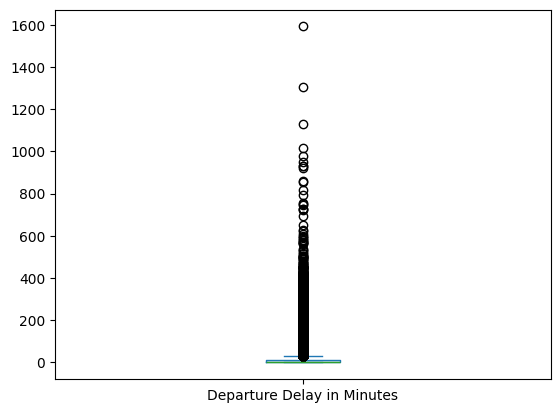

In [27]:
df["Departure Delay in Minutes"].plot.box()

In [28]:
df["Departure Delay in Minutes"].quantile(0.9)

44.0

In [29]:
df["Dept_Delay"] = df["Departure Delay in Minutes"]
df["Arr_Delay"] = df["Arrival Delay in Minutes"]

In [30]:
df.drop(["Departure Delay in Minutes", "Arrival Delay in Minutes"], axis=1, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

<Axes: >

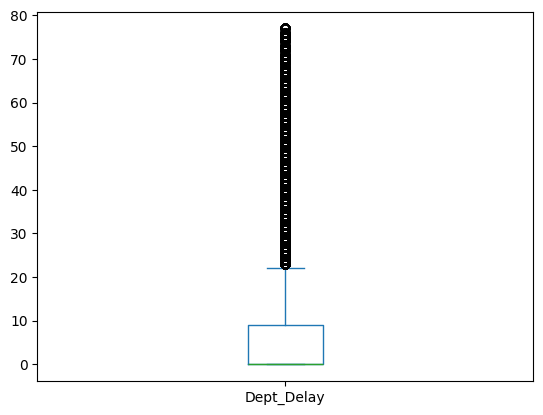

In [32]:
df[df["Dept_Delay"]<=df["Dept_Delay"].quantile(0.95)]["Dept_Delay"].plot.box()

In [33]:
df[df["Dept_Delay"]<=df["Dept_Delay"].quantile(0.9)]["Dept_Delay"].shape

(117180,)

In [34]:
df = df[df["Dept_Delay"]<=df["Dept_Delay"].quantile(0.9)]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117180 entries, 0 to 129875
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       117180 non-null  object 
 1   Gender                             117180 non-null  object 
 2   Customer Type                      117180 non-null  object 
 3   Age                                117180 non-null  int64  
 4   Type of Travel                     117180 non-null  object 
 5   Class                              117180 non-null  object 
 6   Flight Distance                    117180 non-null  int64  
 7   Seat comfort                       117180 non-null  int64  
 8   Departure/Arrival time convenient  117180 non-null  int64  
 9   Food and drink                     117180 non-null  int64  
 10  Gate location                      117180 non-null  int64  
 11  Inflight wifi service              117180 no

<Axes: >

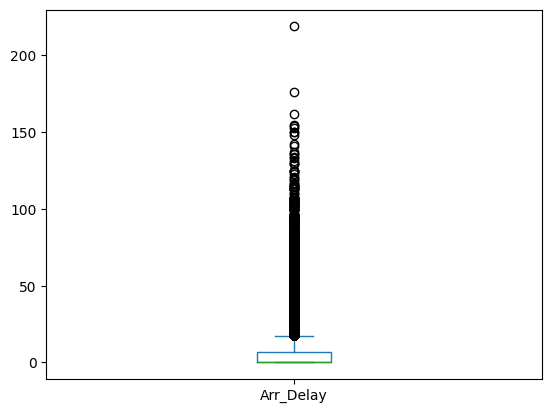

In [36]:
df["Arr_Delay"].plot.box()

<Axes: >

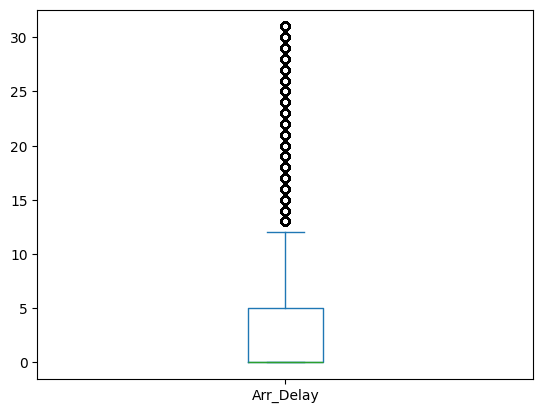

In [37]:
df[df["Arr_Delay"]<=df["Arr_Delay"].quantile(0.95)]["Arr_Delay"].plot.box()

In [38]:
df[df["Arr_Delay"]<=df["Arr_Delay"].quantile(0.95)]["Arr_Delay"].shape

(111230,)

In [39]:
df = df[df["Arr_Delay"]<=df["Arr_Delay"].quantile(0.95)]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111230 entries, 0 to 129875
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       111230 non-null  object 
 1   Gender                             111230 non-null  object 
 2   Customer Type                      111230 non-null  object 
 3   Age                                111230 non-null  int64  
 4   Type of Travel                     111230 non-null  object 
 5   Class                              111230 non-null  object 
 6   Flight Distance                    111230 non-null  int64  
 7   Seat comfort                       111230 non-null  int64  
 8   Departure/Arrival time convenient  111230 non-null  int64  
 9   Food and drink                     111230 non-null  int64  
 10  Gate location                      111230 non-null  int64  
 11  Inflight wifi service              111230 no

<Axes: xlabel='Seat comfort', ylabel='count'>

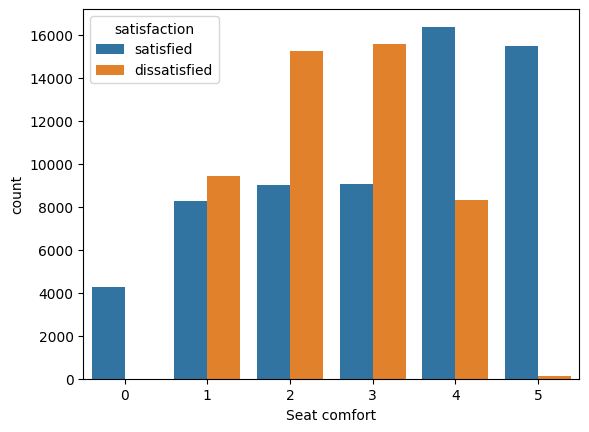

In [41]:
sns.countplot(x=df["Seat comfort"], hue=df["satisfaction"])

<Axes: xlabel='Departure/Arrival time convenient', ylabel='count'>

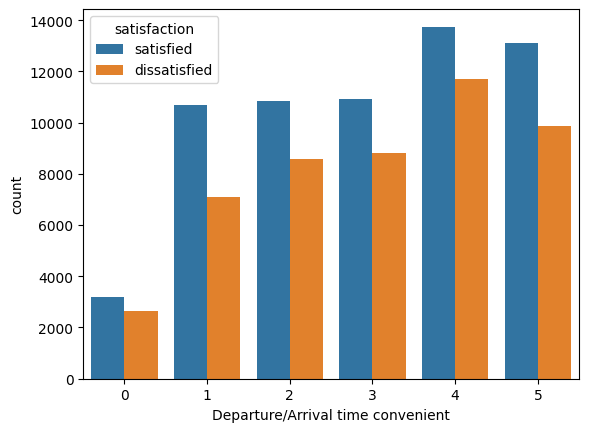

In [42]:
sns.countplot(x=df["Departure/Arrival time convenient"], hue=df["satisfaction"])

<Axes: xlabel='Food and drink', ylabel='count'>

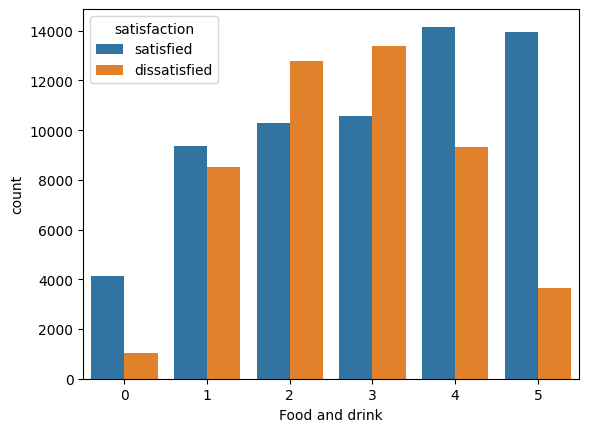

In [43]:
sns.countplot(x=df["Food and drink"], hue=df["satisfaction"])

<Axes: xlabel='Gate location', ylabel='count'>

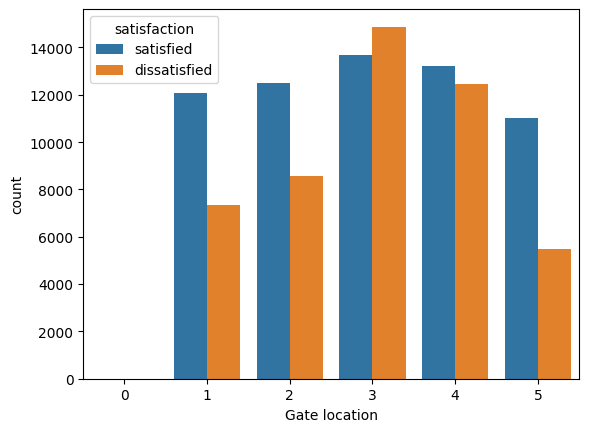

In [44]:
sns.countplot(x=df["Gate location"], hue=df["satisfaction"])

<Axes: xlabel='Inflight wifi service', ylabel='count'>

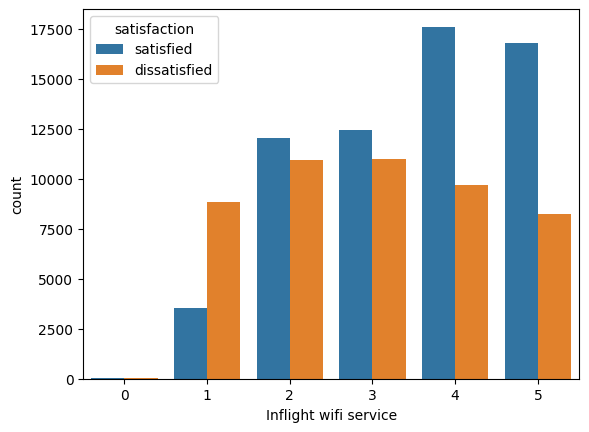

In [45]:
sns.countplot(x=df["Inflight wifi service"], hue=df["satisfaction"])

* According to this graph, you can see that almost all passengers who rated 
the wifi service 5 out of 5 points were satisfied with the flight.

<Axes: xlabel='Inflight entertainment', ylabel='count'>

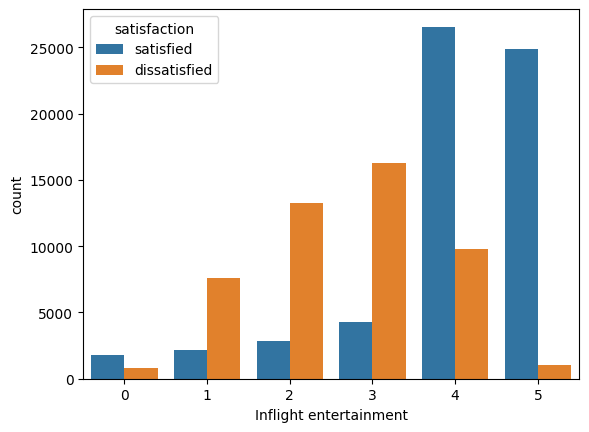

In [46]:
sns.countplot(x=df["Inflight entertainment"], hue=df["satisfaction"])

<Axes: xlabel='Online support', ylabel='count'>

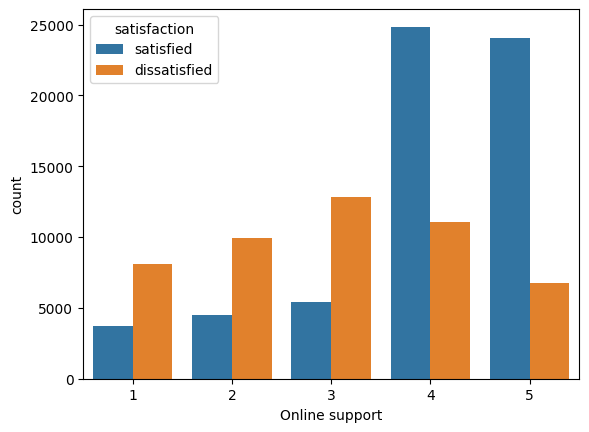

In [47]:
sns.countplot(x=df["Online support"], hue=df["satisfaction"])

<Axes: xlabel='Ease of Online booking', ylabel='count'>

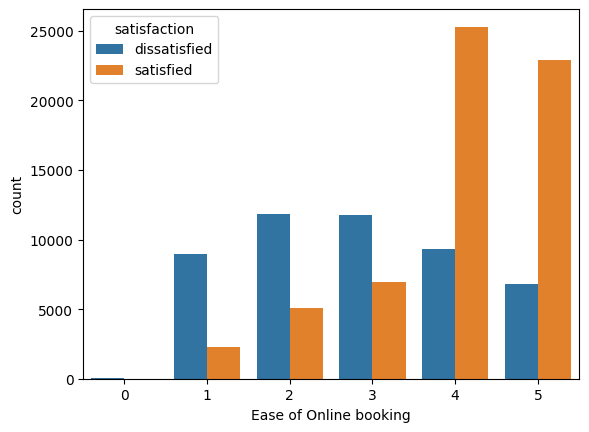

In [48]:
sns.countplot(x=df["Ease of Online booking"], hue=df["satisfaction"])

<Axes: xlabel='On-board service', ylabel='count'>

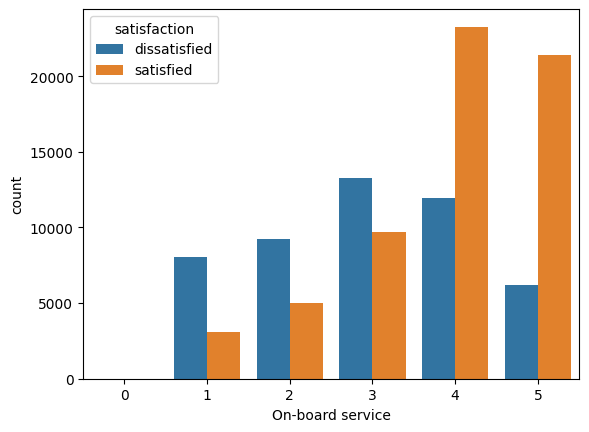

In [49]:
sns.countplot(x=df["On-board service"], hue=df["satisfaction"])

<Axes: xlabel='Leg room service', ylabel='count'>

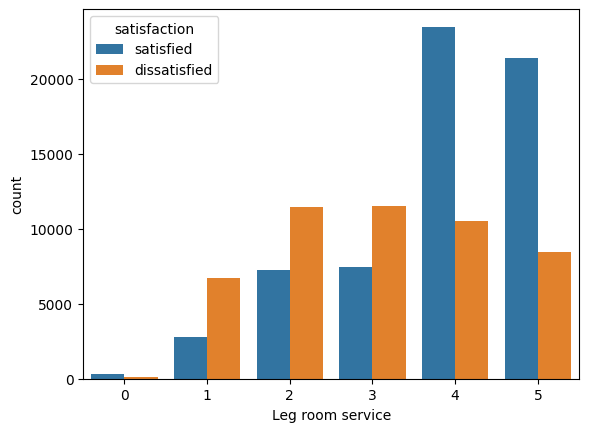

In [50]:
sns.countplot(x=df["Leg room service"], hue=df["satisfaction"])

<Axes: xlabel='Baggage handling', ylabel='count'>

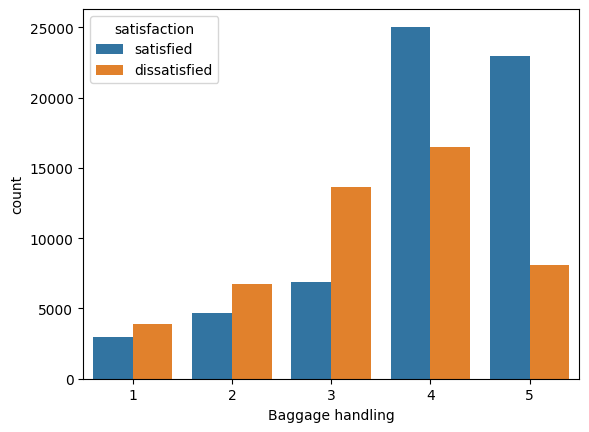

In [51]:
sns.countplot(x=df["Baggage handling"], hue=df["satisfaction"])

<Axes: xlabel='Checkin service', ylabel='count'>

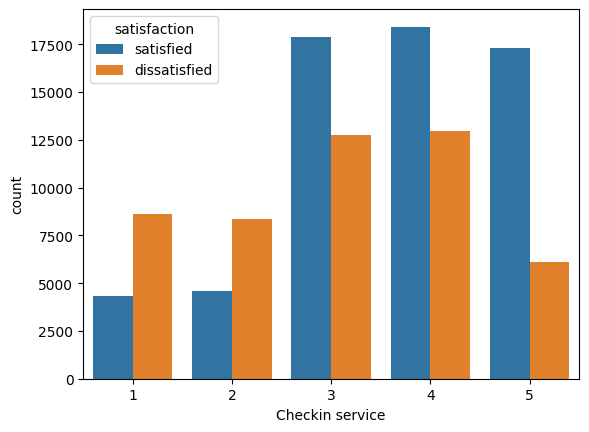

In [52]:
sns.countplot(x=df["Checkin service"], hue=df["satisfaction"])

<Axes: xlabel='Cleanliness', ylabel='count'>

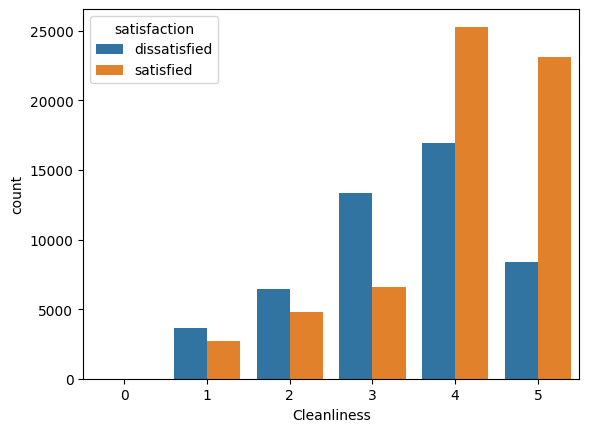

In [53]:
sns.countplot(x=df["Cleanliness"], hue=df["satisfaction"])

<Axes: xlabel='Online boarding', ylabel='count'>

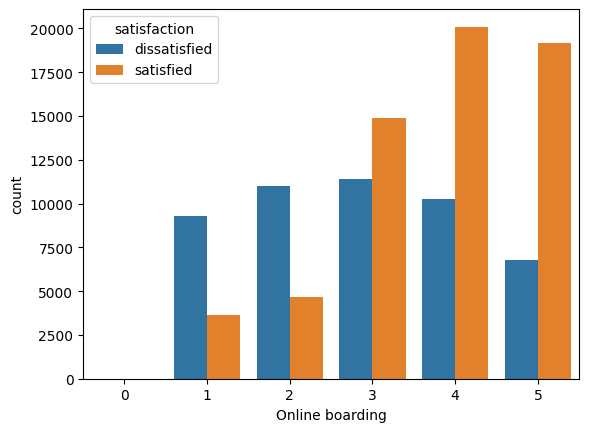

In [54]:
sns.countplot(x=df["Online boarding"], hue=df["satisfaction"])

# Logistic Regression

In [55]:
df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Dept_Delay                           0
Arr_Delay                            0
dtype: int64

In [56]:
df["Male"]=pd.get_dummies(df["Gender"], dtype="int", drop_first=True)

In [57]:
df[["Gender", "Male"]]

,Gender,Male
0,Female,0
2,Female,0
3,Female,0
4,Female,0
5,Male,1
...,...,...
129869,Female,0
129871,Female,0
129872,Female,0
129874,Female,0


In [58]:
df.drop("Gender", axis=1, inplace=True)

In [59]:
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [60]:
df["Loyal_Customer"] = list(map(lambda x: 1 if x[0]=="L" else 0, df["Customer Type"]))

In [61]:
df[["Customer Type", "Loyal_Customer"]]

,Customer Type,Loyal_Customer
0,Loyal Customer,1
2,Loyal Customer,1
3,Loyal Customer,1
4,Loyal Customer,1
5,Loyal Customer,1
...,...,...
129869,disloyal Customer,0
129871,disloyal Customer,0
129872,disloyal Customer,0
129874,disloyal Customer,0


In [62]:
df.drop("Customer Type", axis=1, inplace=True)

In [63]:
df["Type of Travel"].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [64]:
df["Type of Travel"] = list(map(lambda x: 1 if x[0]=="P" else 0, df["Type of Travel"]))

In [65]:
df.head()

,satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay,Male,Loyal_Customer
0,satisfied,65,1,Eco,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0.0,0,1
2,satisfied,15,1,Eco,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0.0,0,1
3,satisfied,60,1,Eco,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0.0,0,1
4,satisfied,70,1,Eco,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0.0,0,1
5,satisfied,30,1,Eco,1894,0,0,0,3,2,...,5,4,5,5,4,2,0,0.0,1,1


In [66]:
df.isna().sum()

satisfaction                         0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Dept_Delay                           0
Arr_Delay                            0
Male                                 0
Loyal_Customer                       0
dtype: int64

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le = LabelEncoder()

In [69]:
le.fit_transform(df["Class"])

array([1, 1, 1, ..., 1, 1, 1])

In [70]:
df["Class"] = le.fit_transform(df["Class"])

In [71]:
df.head()

,satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay,Male,Loyal_Customer
0,satisfied,65,1,1,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0.0,0,1
2,satisfied,15,1,1,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0.0,0,1
3,satisfied,60,1,1,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0.0,0,1
4,satisfied,70,1,1,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0.0,0,1
5,satisfied,30,1,1,1894,0,0,0,3,2,...,5,4,5,5,4,2,0,0.0,1,1


In [72]:
df.isna().sum()

satisfaction                         0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Dept_Delay                           0
Arr_Delay                            0
Male                                 0
Loyal_Customer                       0
dtype: int64

In [73]:
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=98)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model = LogisticRegression()

In [78]:
model.fit(X_tr, y_tr)

LogisticRegression()

In [79]:
y_pred = model.predict(X_te)

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
accuracy_score(y_te, y_pred)

0.7884062140391255

In [82]:
confusion_matrix(y_te, y_pred)

array([[ 8329,  3644],
       [ 2240, 13595]], dtype=int64)

In [83]:
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

dissatisfied       0.79      0.70      0.74     11973
   satisfied       0.79      0.86      0.82     15835

    accuracy                           0.79     27808
   macro avg       0.79      0.78      0.78     27808
weighted avg       0.79      0.79      0.79     27808



In [84]:
model.score(X_tr, y_tr)

0.7852604828462516